Epoch0/200 | Discriminator Loss: 0.6280752122402191 | Generator Loss : 0.6261289715766907
Epoch1/200 | Discriminator Loss: 0.6266337931156158 | Generator Loss : 0.6439244747161865
Epoch2/200 | Discriminator Loss: 0.6416761577129364 | Generator Loss : 0.6448894739151001
Epoch3/200 | Discriminator Loss: 0.6363779008388519 | Generator Loss : 0.6484580636024475
Epoch4/200 | Discriminator Loss: 0.6364101767539978 | Generator Loss : 0.6323426961898804
Epoch5/200 | Discriminator Loss: 0.6380303502082825 | Generator Loss : 0.655808687210083
Epoch6/200 | Discriminator Loss: 0.6259340643882751 | Generator Loss : 0.6255316734313965
Epoch7/200 | Discriminator Loss: 0.6292701363563538 | Generator Loss : 0.6379303932189941
Epoch8/200 | Discriminator Loss: 0.6344732642173767 | Generator Loss : 0.6259705424308777
Epoch9/200 | Discriminator Loss: 0.630649745464325 | Generator Loss : 0.6330972909927368
Epoch10/200 | Discriminator Loss: 0.6424860954284668 | Generator Loss : 0.6238829493522644
Epoch11/200

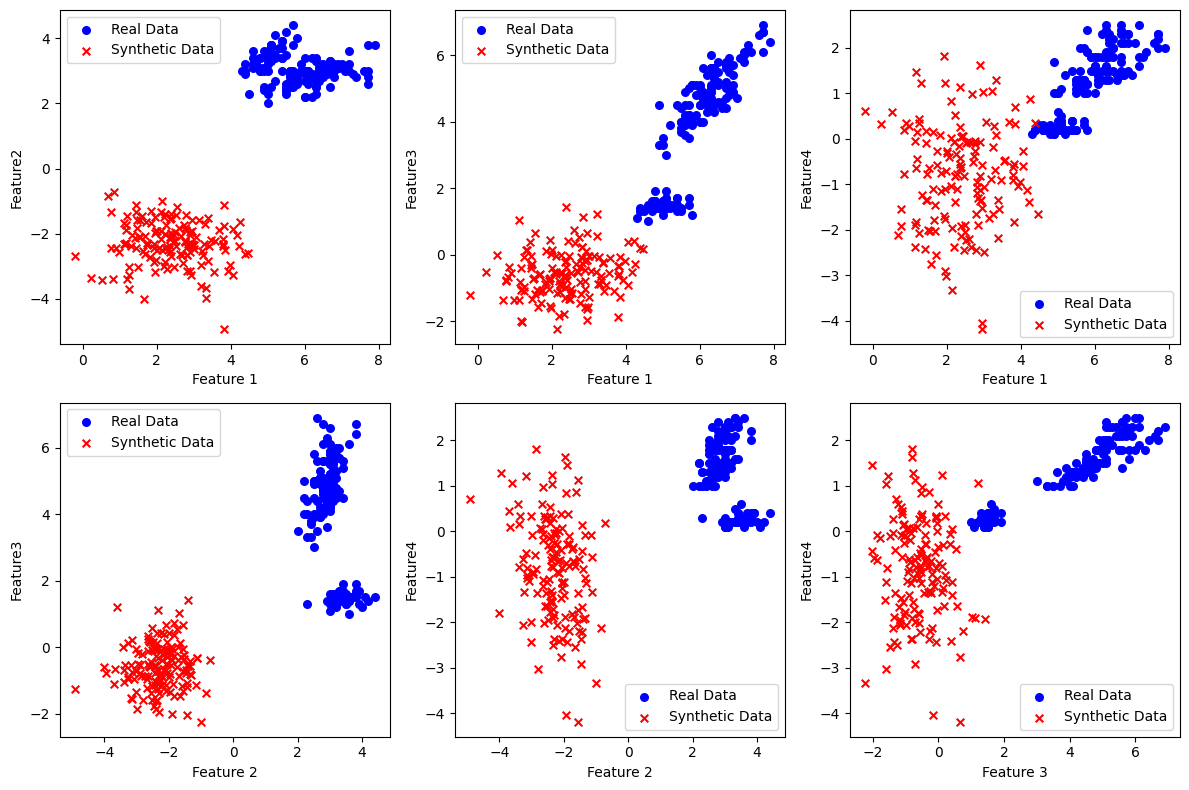

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris= load_iris()
x_train= iris.data
def build_generator():
    model= Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear')) 
    return model
def build_discriminator():
    model= Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1,activation= 'sigmoid'))
    return model
def build_gan(generator,discriminator):
    discriminator.trainable= False
    model= Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
generator= build_generator()
discriminator= build_discriminator()
gan= build_gan(generator, discriminator)
generator.compile(loss='mean_squared_error', optimizer= Adam(0.0002,0.5))
discriminator.compile(loss= 'binary_crossentropy', optimizer=Adam(0.0002, 0.5),metrics=['accuracy'])
gan.compile(loss= 'binary_crossentropy',optimizer= Adam(0.0002,0.5))
epochs= 200
batch_size =16
for epoch in range(epochs):
    idx= np.random.randint(0,x_train.shape[0],batch_size)
    real_samples= x_train[idx]
    fake_samples= generator.predict(np.random.normal(0,1,(batch_size,100)),verbose=0)
    real_labels= np.ones((batch_size,1))
    fake_labels= np.zeros((batch_size,1))
    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake= discriminator.train_on_batch(fake_samples, fake_labels)
    noise=np.random.normal(0,1,(batch_size, 100))
    g_loss= gan.train_on_batch(noise, real_labels)
    print(f"Epoch{epoch}/{epochs} | Discriminator Loss: {0.5 * (d_loss_real[0] + d_loss_fake[0])} | Generator Loss : {g_loss}")
synthetic_data= generator.predict(np.random.normal(0,1,(150,100)),verbose= 0)
plt.figure(figsize=(12,8))
plot_idx = 1
for i in range(4):
    for j in range(i+1, 4):
        plt.subplot(2,3,plot_idx)
        plt.scatter(x_train[:,i],x_train[:,j], label= 'Real Data', c='blue', marker = 'o', s=30)
        plt.scatter(synthetic_data[:,i],synthetic_data[:,j], label= 'Synthetic Data', c='red', marker='x', s=30)
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel(f'Feature{j+1}')
        plt.legend()
        plot_idx +=1
plt.tight_layout()
plt.show()